## Import Required Libraries

In [19]:
pip install pandas numpy matplotlib seaborn jupyter

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

## Load the Dataset

In [21]:
df = pd.read_csv('../data/food_price_inflation.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")

Dataset loaded successfully!
Shape: (59839, 4)


In [22]:
df.head()

,REF_AREA,REF_AREA_LABEL,TIME_PERIOD,OBS_VALUE
0,AFG,Afghanistan,2001-01-01,22.943765
1,AFG,Afghanistan,2001-02-01,24.357903
2,AFG,Afghanistan,2001-03-01,21.202933
3,AFG,Afghanistan,2001-04-01,17.301832
4,AFG,Afghanistan,2001-05-01,9.334624


## Data Information

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59839 entries, 0 to 59838
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REF_AREA        59839 non-null  object 
 1   REF_AREA_LABEL  59839 non-null  object 
 2   TIME_PERIOD     59839 non-null  object 
 3   OBS_VALUE       59839 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.8+ MB


## Summary Statistics

In [24]:
df.describe()

,OBS_VALUE
count,59839.000000
mean,45.477730
std,2864.567081
min,-24.982988
25%,1.497504
50%,4.091723
75%,8.585937
max,371537.503265


## Check for Missing Values

In [25]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

Missing values per column:
REF_AREA          0
REF_AREA_LABEL    0
TIME_PERIOD       0
OBS_VALUE         0
dtype: int64

Total missing values: 0


## Data Preprocessing

In [26]:
df['TIME_PERIOD'] = pd.to_datetime(df['TIME_PERIOD'])
df['Year'] = df['TIME_PERIOD'].dt.year
df['Month'] = df['TIME_PERIOD'].dt.month
df.head()

,REF_AREA,REF_AREA_LABEL,TIME_PERIOD,OBS_VALUE,Year,Month
0,AFG,Afghanistan,2001-01-01,22.943765,2001,1
1,AFG,Afghanistan,2001-02-01,24.357903,2001,2
2,AFG,Afghanistan,2001-03-01,21.202933,2001,3
3,AFG,Afghanistan,2001-04-01,17.301832,2001,4
4,AFG,Afghanistan,2001-05-01,9.334624,2001,5


## Visualizations

### 1. Line Chart: Price Inflation Over Time

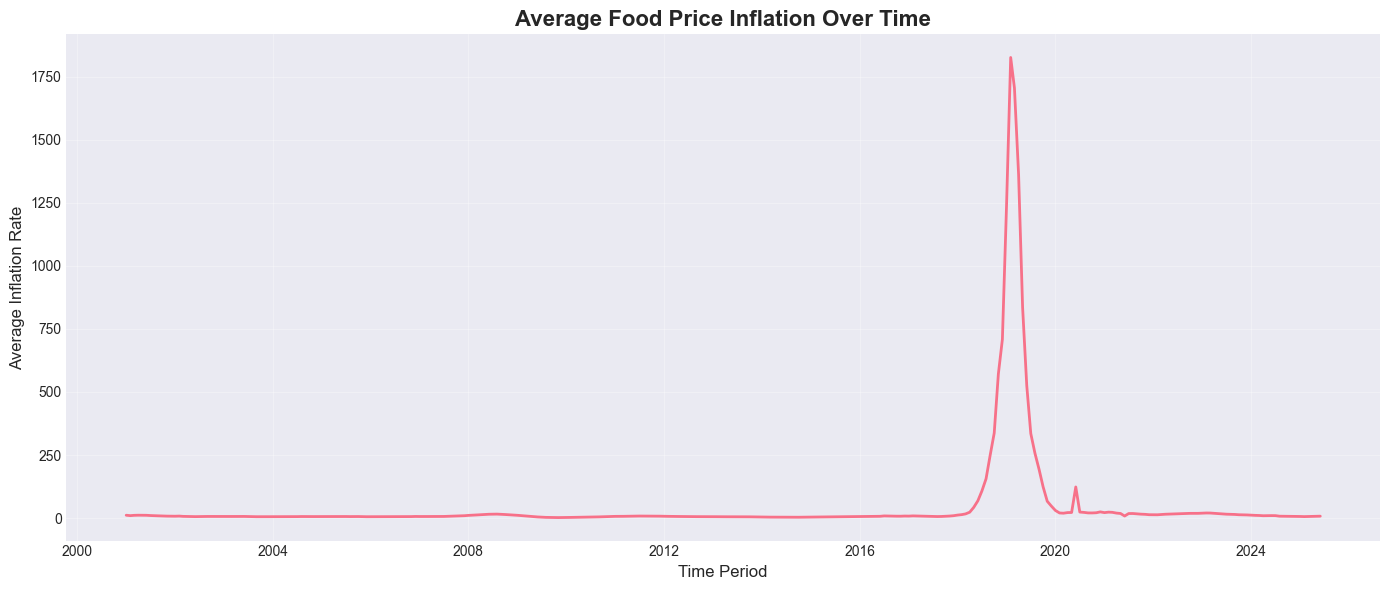

In [27]:
plt.figure(figsize=(14, 6))
avg_by_time = df.groupby('TIME_PERIOD')['OBS_VALUE'].mean()
plt.plot(avg_by_time.index, avg_by_time.values, linewidth=2)
plt.title('Average Food Price Inflation Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Average Inflation Rate', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2. Bar Chart: Top 10 Countries by Average Inflation

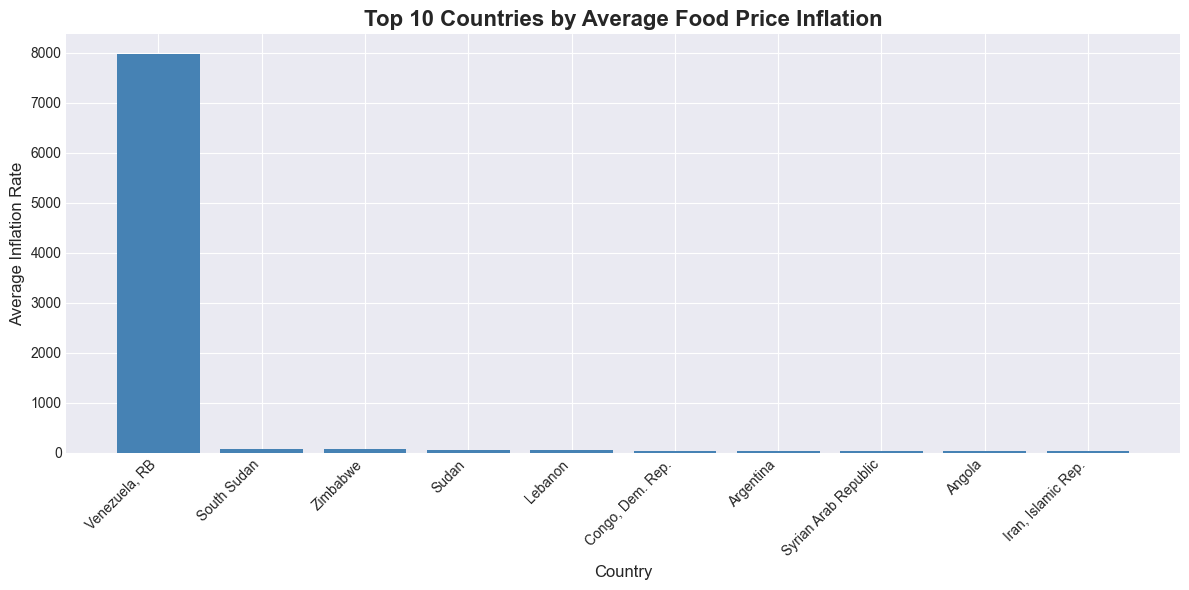

In [28]:
plt.figure(figsize=(12, 6))
top_countries = df.groupby('REF_AREA_LABEL')['OBS_VALUE'].mean().sort_values(ascending=False).head(10)
plt.bar(range(len(top_countries)), top_countries.values, color='steelblue')
plt.xticks(range(len(top_countries)), top_countries.index, rotation=45, ha='right')
plt.title('Top 10 Countries by Average Food Price Inflation', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Inflation Rate', fontsize=12)
plt.tight_layout()
plt.show()

### 3. Distribution of Inflation Values

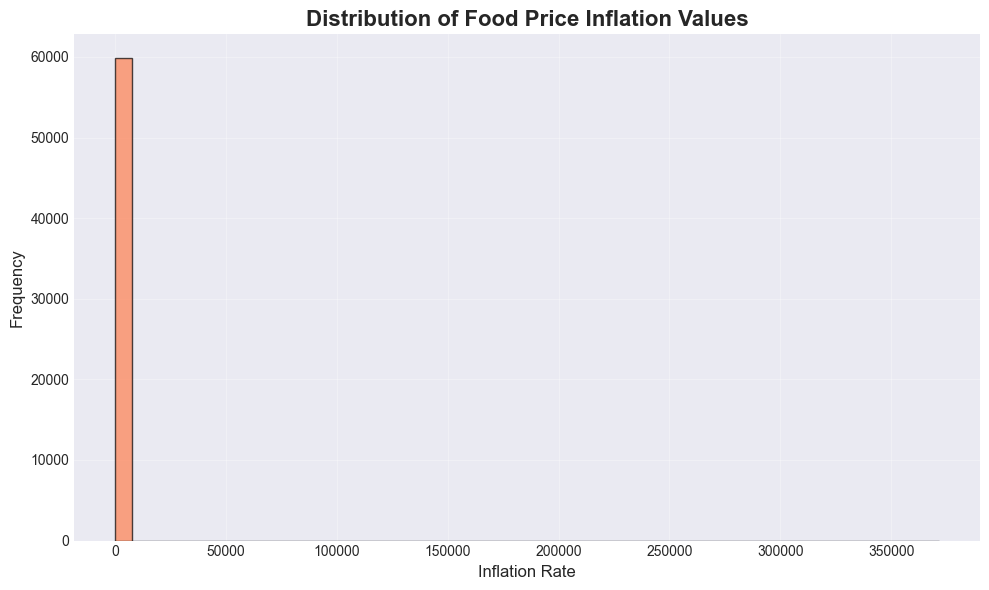

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(df['OBS_VALUE'], bins=50, color='coral', edgecolor='black', alpha=0.7)
plt.title('Distribution of Food Price Inflation Values', fontsize=16, fontweight='bold')
plt.xlabel('Inflation Rate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 4. Yearly Trend Analysis

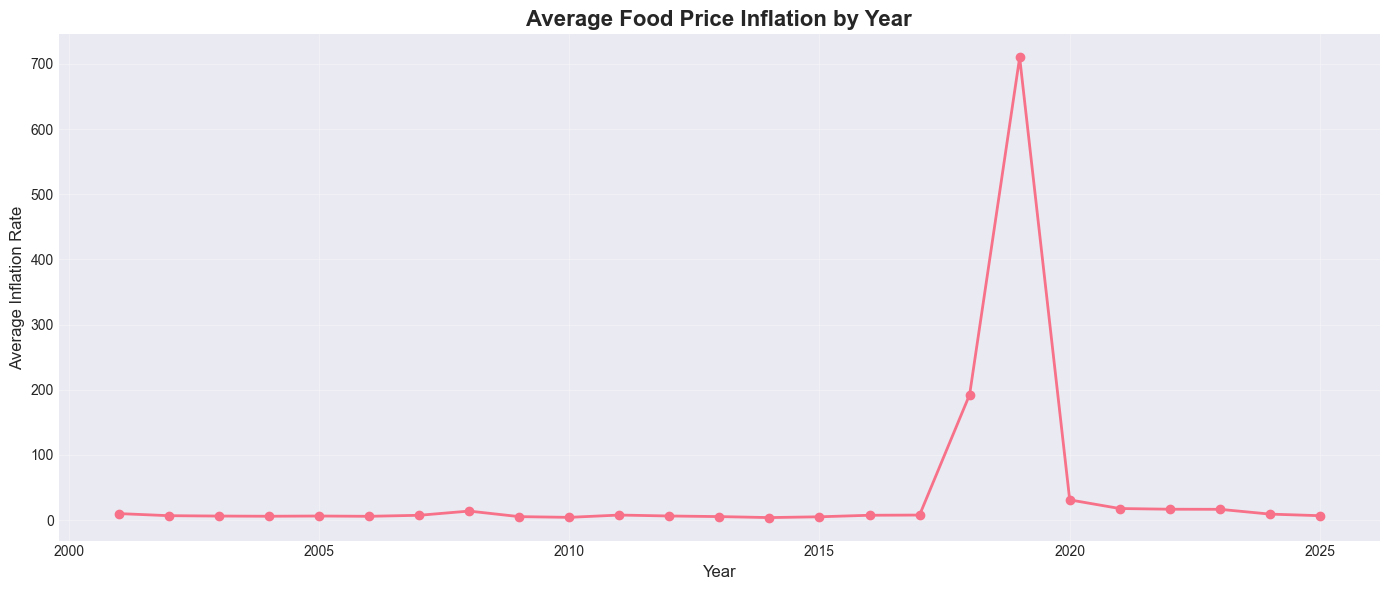

In [30]:
plt.figure(figsize=(14, 6))
yearly_avg = df.groupby('Year')['OBS_VALUE'].mean()
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=2, markersize=6)
plt.title('Average Food Price Inflation by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Inflation Rate', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Insights and Conclusions

### Key Findings:

1. **Temporal Trends**: The analysis reveals significant variations in food price inflation over time, with certain periods showing sharp increases.

2. **Regional Variations**: Different countries experience vastly different levels of food price inflation, with some regions consistently showing higher rates.

3. **Distribution Patterns**: The distribution of inflation values shows that most observations cluster around moderate levels, with some extreme outliers.

4. **Yearly Patterns**: Year-over-year analysis helps identify long-term trends and potential cyclical patterns in food price inflation.

### Implications:

- Policymakers should pay attention to countries with persistently high inflation rates
- The temporal patterns suggest the influence of global economic events on food prices
- Regional differences indicate the need for localized food security strategies

### Future Analysis:

- Investigate correlation with economic indicators
- Analyze seasonal patterns in food price inflation
- Build predictive models for future inflation trends